In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- Description of Purpose and Data

타이타닉을 탑승한 사람들의 정보를 통해 생존 or 사망을 예측하는 간단한 태스크이다.

Featue는 PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked가 존재하며
Target은 Surevived 이다.

직관적으로 Name, Age, SibSp, Ticket, Cabin, Parch, Embarked 컬럼은 생존 및 사망 예측에 영향을 미치지 않을 것 같아 모델을 학습시킬때는 삭제시켰다.

# Load Data

In [105]:
train = pd.read_csv("C:/Users/2022010560/Desktop/Dataset/Titanic/train.csv")


# Data 파악 및 전처리

In [106]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 

(None, None)

In [107]:
# set "PassengerId" variable as index
train.set_index("PassengerId", inplace=True)
#test.set_index("PassengerId", inplace=True)

In [108]:
# generate training target set (y_train)
y_train = train["Survived"]

In [109]:
# delete column "Survived" from train set
train.drop(labels="Survived", axis=1, inplace=True)

In [110]:
# shapes of train and test sets
train.shape

(891, 10)

In [111]:
# join train and test sets to form a new train_test set
#train_test =  train.append(test)

In [112]:
# delete columns that are not used as features for training and prediction
columns_to_drop = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
train.drop(labels=columns_to_drop, axis=1, inplace=True)

In [113]:
# convert objects to numbers by pandas.get_dummies
train = pd.get_dummies(train, columns=["Sex"])

In [114]:
# check the dimension
train.shape

(891, 4)

In [115]:
# replace nulls with 0.0
train.fillna(value=0.0, inplace=True)

In [116]:
# generate feature sets (X)
X_train = train_test_dummies.values[0:]
#X_test = train_test_dummies.values[891:]

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train) 
#X_test_scale = scaler.transform(X_test)

In [119]:
# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_scale, y_train, random_state=0)

# 모델 생성

## Random Forest

랜덤 포레스트는 지도 머신 러닝 알고리즘이다. 정확성, 단순성 및 유연성으로 인해 가장 많이 사용되는 알고리즘 중 하나이다. 분류 및 회귀 작업에 사용할 수 있다는 사실과 비선형 특성을 결합하면 다양한 데이터 및 상황에 매우 적합하다.

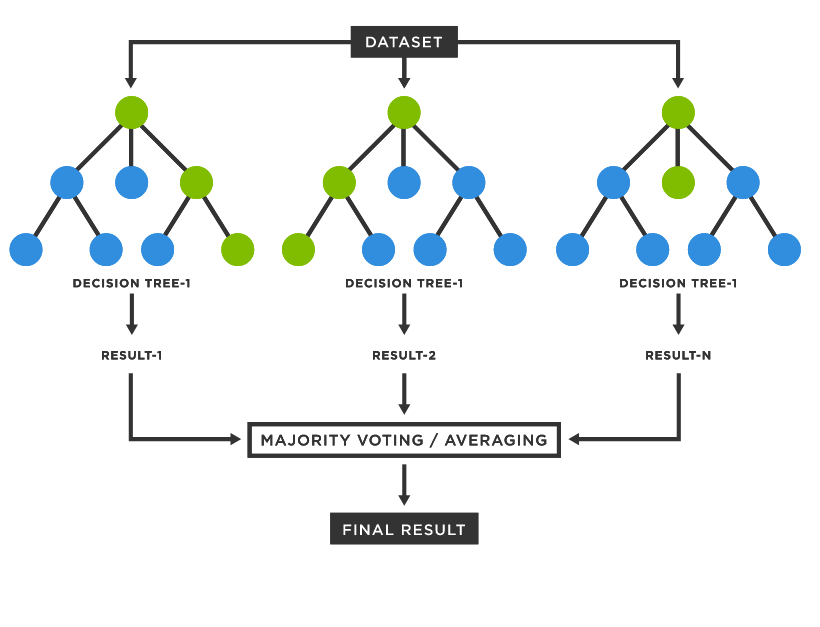


Ref : https://www.tibco.com/ko/reference-center/what-is-a-random-forest

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }



model_RF = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf_grid_cv = GridSearchCV(model_RF, param_grid = params, cv = 3, n_jobs = -1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]})

In [121]:
print('최적 하이퍼 파라미터: ', rf_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(rf_grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8039


In [122]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))


Confusion Matrix:
[[122  17]
 [ 27  57]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.77      0.68      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



C:\Users\2022010560\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


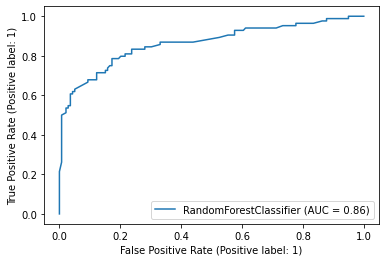

In [123]:
from sklearn import metrics

#AUC 값.

metrics.plot_roc_curve(rf_clf1, X_test, y_test) 

plt.show()

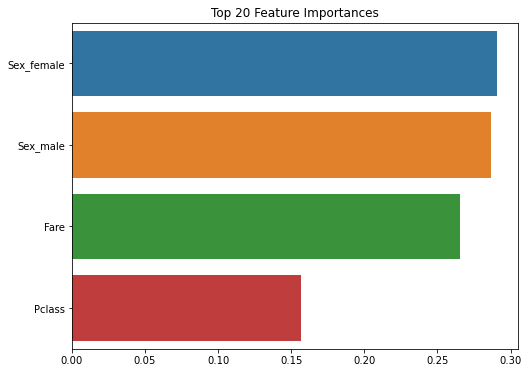

In [125]:
import seaborn as sns


ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## AdaBoost

Adaboost 알고리즘은 분류 기반 기계학습 모형으로, 예측 성능이 조금 낮은 약한 학습기(weak classifier)를 다량 구축 및 조합하여 가중치 수정을 통해 좀 더 나은 성능을 발휘하는 하나의 강한 분류기(strong classifier)를 합성하는 방법의 알고리즘이다. 

Adaboost 모형은 약한 분류기의 실수를 통해 가중치를 반복적으로 수정하고 결합하여 정확도를 높일 수 있으며 학습 데이터에 과적합(overfitting) 현상이 적게 발생하여 예측 성능을 저하하지 않는 장점이 있다.

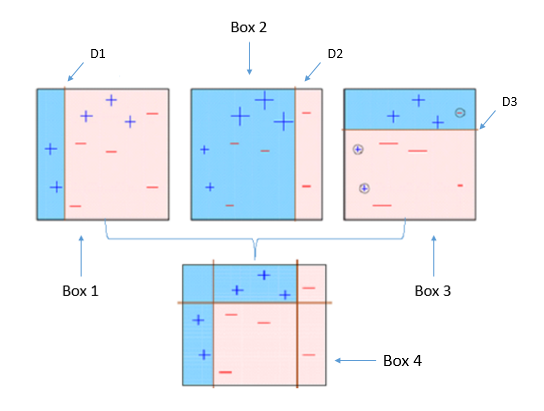


Ref : http://www.incodom.kr/Adaboost


In [141]:
from sklearn.ensemble import AdaBoostClassifier

Ada_grid = dict()
Ada_grid['n_estimators'] = [10, 50, 100, 500]
Ada_grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]


model_Ada = AdaBoostClassifier()
Ada_grid_cv = GridSearchCV(model_Ada, param_grid = Ada_grid, cv = 3, n_jobs = -1)
Ada_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]})

In [142]:
print('최적 하이퍼 파라미터: ', Ada_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(Ada_grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 1.0, 'n_estimators': 50}
최고 예측 정확도: 0.7935


In [143]:
Ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

Ada_clf.fit(X_train, y_train)
pred = Ada_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))


Confusion Matrix:
[[115  24]
 [ 25  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.71      0.70      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



C:\Users\2022010560\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


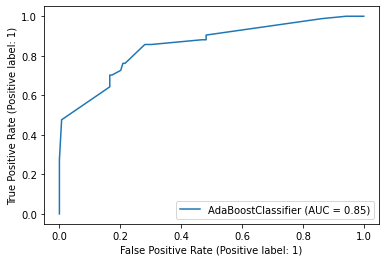

In [144]:
#AUC 값.

metrics.plot_roc_curve(Ada_clf, X_test, y_test) 

plt.show()

## GradientBoost

Gradient Boosting Algorithm (GBM)은 회귀분석 또는 분류 분석을 수행할 수 있는 예측모형이며 예측모형의 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘이다. 

Gradient Boosting Algorithm은 Tabular format 데이터 (엑셀형태와 같이 X-Y Grid로 되어있는 데이터)에 대한 예측에서 엄청난 성능을 보여주고, 머신러닝 알고리즘 중에서도 가장 예측 성능이 높다고 알려진 알고리즘이다.

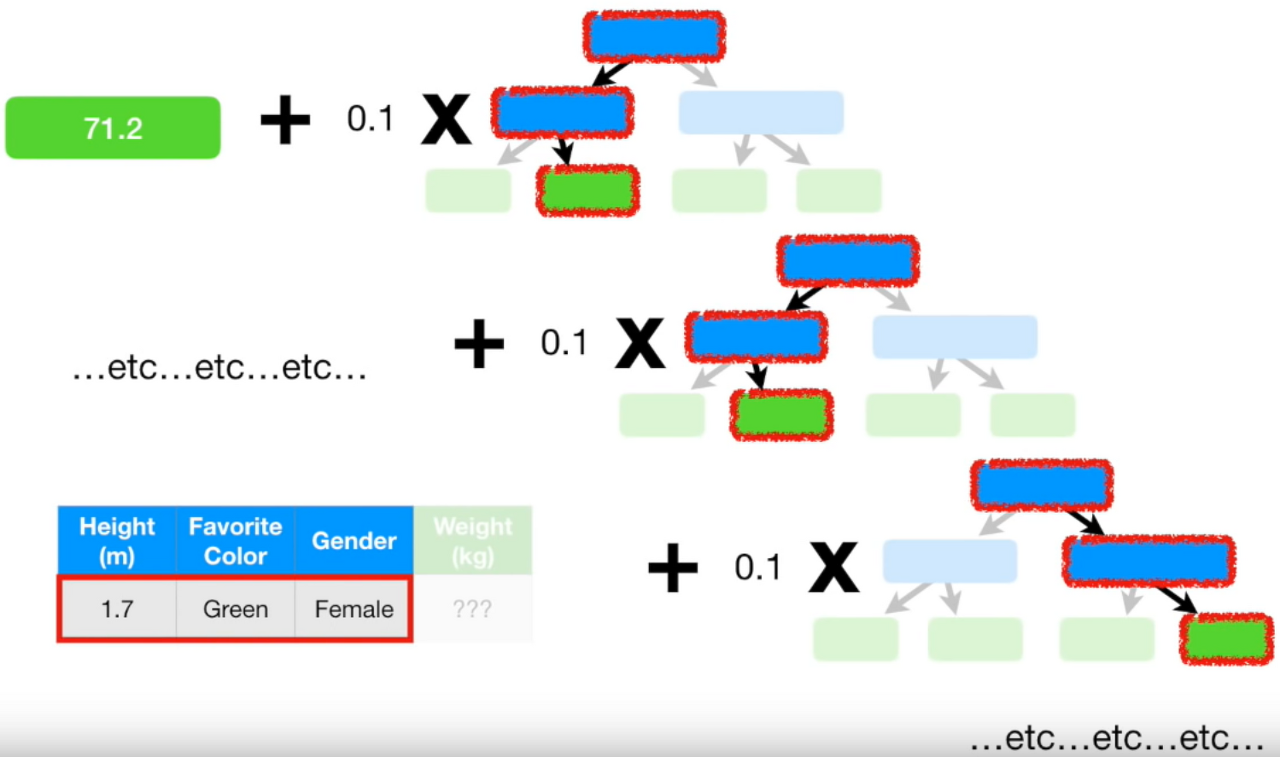

Ref1 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost

Ref2 : https://3months.tistory.com/368 

In [145]:
from sklearn.ensemble import GradientBoostingClassifier 

GBM_grid = dict()
GBM_grid['n_estimators'] = [10, 50, 100, 500]
GBM_grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
GBM_grid['max_depth'] = [6,8,10,12]

model_GBM = GradientBoostingClassifier()
GBM_grid_cv = GridSearchCV(model_GBM, param_grid = GBM_grid, cv = 3, n_jobs = -1)
GBM_grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', GBM_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(GBM_grid_cv.best_score_))



최적 하이퍼 파라미터:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
최고 예측 정확도: 0.7979


Confusion Matrix:
[[118  21]
 [ 22  62]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       139
           1       0.75      0.74      0.74        84

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



C:\Users\2022010560\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


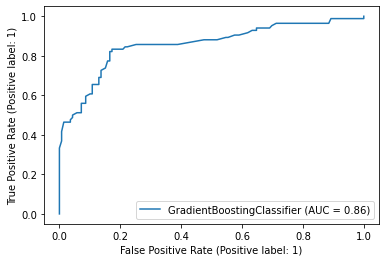

In [146]:
GBM_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,max_depth=6)

GBM_clf.fit(X_train, y_train)
pred = GBM_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))

#AUC 값.

metrics.plot_roc_curve(GBM_clf, X_test, y_test) 

plt.show()

## XGBoost

XGBoost는 Gradient Boosting 알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 라이브러리이다. 

Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘이다.

XGBoost는 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘이다.

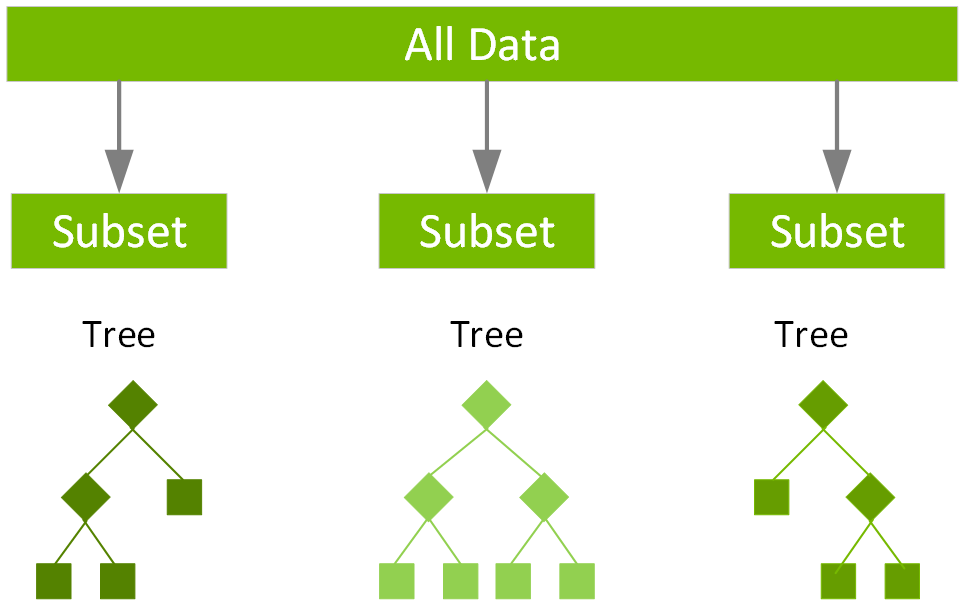

Ref 1: https://www.nvidia.com/en-us/glossary/data-science/xgboost/

Ref 2: https://bcho.tistory.com/1354

In [152]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_grid = dict()
xgb_grid['n_estimators'] = [10, 50, 100, 500]
xgb_grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
xgb_grid['max_depth'] = [6,8,10,12]
xgb_grid['gamma'] = [0.5,1,2]

model_xgb = XGBClassifier()
xgb_grid_cv = GridSearchCV(model_xgb, param_grid = xgb_grid, cv = 3, n_jobs = -1)
xgb_grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', xgb_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(xgb_grid_cv.best_score_))



최적 하이퍼 파라미터:  {'gamma': 2, 'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 500}
최고 예측 정확도: 0.8009


Confusion Matrix:
[[118  21]
 [ 22  62]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       139
           1       0.75      0.74      0.74        84

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



C:\Users\2022010560\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


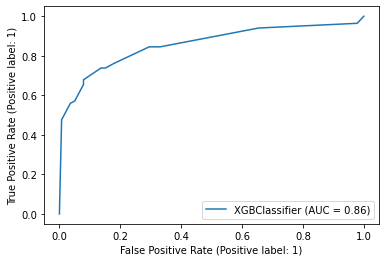

In [153]:
xgb_clf = XGBClassifier(gamma=2,n_estimators=500, learning_rate=0.001,max_depth=6)

xgb_clf.fit(X_train, y_train)
pred = xgb_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))

#AUC 값.

metrics.plot_roc_curve(GBM_clf, X_test, y_test) 

plt.show()

## Light GBM

Light GBM은 Gradient Boosting 프레워크로 Tree 기반 학습 알고리즘이다.

Light GBM은 Tree가 수직적으로 확장되는 반면에 다른 알고리즘은 Tree가 수평적으로 확장된다, 즉 Light GBM은 leaf-wise인 반면 다른 알고리즘은 level-wise 이다.

동일한 leaf를 확장할 때, leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 loss, 손실을 줄일 수 있다.

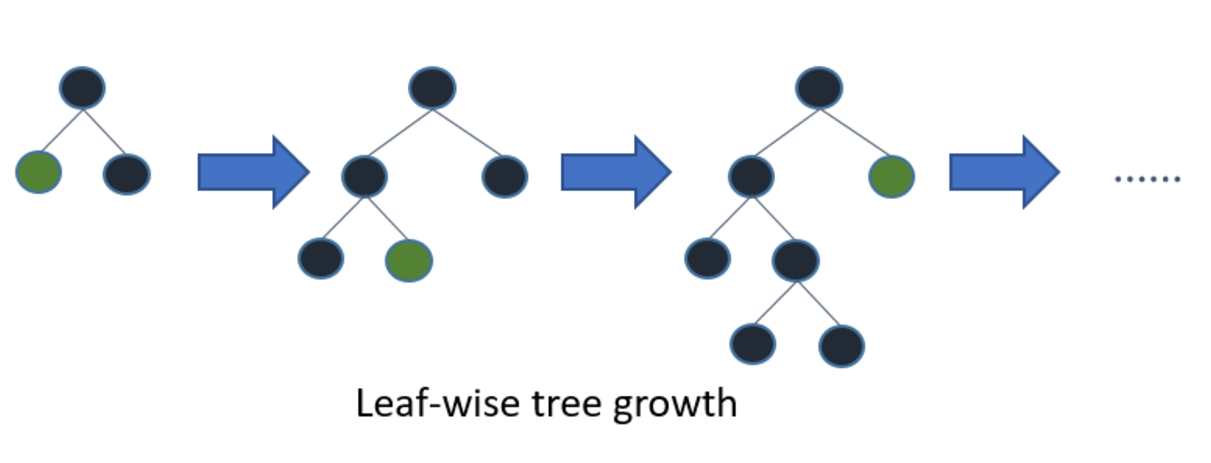

Ref 1: https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/



In [161]:
!pip install lightgbm
import lightgbm as lgb


lgbm_grid = dict()
lgbm_grid['n_estimators'] = [10, 50, 100, 500]
lgbm_grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
lgbm_grid['depth'] = [6,8,10,12]
lgbm_grid['gamma'] = [0.5,1,2]

model_lgbm = lgb.LGBMClassifier()
lgbm_grid_cv = GridSearchCV(model_lgbm, param_grid = lgbm_grid, cv = 3, n_jobs = -1)
lgbm_grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', lgbm_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(lgbm_grid_cv.best_score_))

[LightGBM] [Warning] Unknown parameter: depth
최적 하이퍼 파라미터:  {'depth': 4, 'learning_rate': 0.01, 'n_estimators': 100}
최고 예측 정확도: 0.7979


Confusion Matrix:
[[120  19]
 [ 21  63]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       139
           1       0.77      0.75      0.76        84

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



C:\Users\2022010560\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


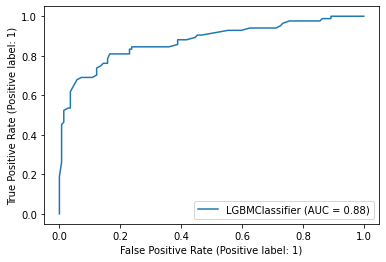

In [157]:
lgbm_clf = lgb.LGBMClassifier(gamma=0.5,n_estimators=500, learning_rate=0.01,max_depth=6)

lgbm_clf.fit(X_train, y_train)
pred = lgbm_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))

#AUC 값.

metrics.plot_roc_curve(lgbm_clf, X_test, y_test) 

plt.show()

## CatBoost

XGBoost 와 더불어 Catboost 는 Level-wise 로 트리를 만들어나간다. 

기존의 부스팅 모델이 일괄적으로 모든 훈련 데이터를 대상으로 잔차계산을 했다면, Catboost 는 일부만 가지고 잔차계산을 한 뒤, 이걸로 모델을 만들고, 그 뒤에 데이터의 잔차는 이 모델로 예측한 값을 사용한다.

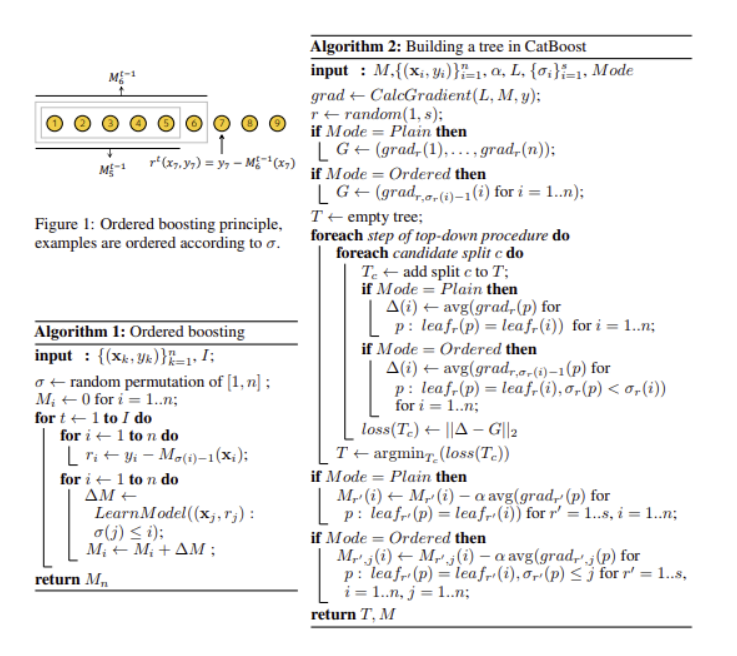

Ref 1: https://gentlej90.tistory.com/100

In [162]:
!pip install catboost
from catboost import CatBoostClassifier


cat_grid = dict()
cat_grid['n_estimators'] = [10, 50, 100, 500]
cat_grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cat_grid['depth'] = [4,6,8,10]


model_cat = CatBoostClassifier()

cat_grid_cv = GridSearchCV(model_cat, param_grid = cat_grid, cv = 3, n_jobs = -1)
cat_grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', cat_grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(cat_grid_cv.best_score_))

0:	learn: 0.6605245	total: 136ms	remaining: 6.64s
1:	learn: 0.6295645	total: 136ms	remaining: 3.27s
2:	learn: 0.6038570	total: 136ms	remaining: 2.14s
3:	learn: 0.5860252	total: 137ms	remaining: 1.57s
4:	learn: 0.5679567	total: 137ms	remaining: 1.24s
5:	learn: 0.5511371	total: 138ms	remaining: 1.01s
6:	learn: 0.5376221	total: 138ms	remaining: 850ms
7:	learn: 0.5254628	total: 139ms	remaining: 730ms
8:	learn: 0.5147859	total: 140ms	remaining: 636ms
9:	learn: 0.5057537	total: 140ms	remaining: 561ms
10:	learn: 0.4977729	total: 141ms	remaining: 499ms
11:	learn: 0.4918567	total: 141ms	remaining: 446ms
12:	learn: 0.4858384	total: 142ms	remaining: 404ms
13:	learn: 0.4805762	total: 142ms	remaining: 366ms
14:	learn: 0.4768308	total: 143ms	remaining: 333ms
15:	learn: 0.4743076	total: 143ms	remaining: 304ms
16:	learn: 0.4714838	total: 144ms	remaining: 279ms
17:	learn: 0.4696853	total: 144ms	remaining: 256ms
18:	learn: 0.4668470	total: 144ms	remaining: 235ms
19:	learn: 0.4644216	total: 145ms	remaini

0:	learn: 0.6605245	total: 635us	remaining: 31.1ms
1:	learn: 0.6295645	total: 1.23ms	remaining: 29.4ms
2:	learn: 0.6038570	total: 1.55ms	remaining: 24.3ms
3:	learn: 0.5860252	total: 1.78ms	remaining: 20.5ms
4:	learn: 0.5679567	total: 2.54ms	remaining: 22.8ms
5:	learn: 0.5511371	total: 3.11ms	remaining: 22.8ms
6:	learn: 0.5376221	total: 3.46ms	remaining: 21.2ms
7:	learn: 0.5254628	total: 3.84ms	remaining: 20.2ms
8:	learn: 0.5147859	total: 4.29ms	remaining: 19.6ms
9:	learn: 0.5057537	total: 4.8ms	remaining: 19.2ms
10:	learn: 0.4977729	total: 5.25ms	remaining: 18.6ms
11:	learn: 0.4918567	total: 5.53ms	remaining: 17.5ms
12:	learn: 0.4858384	total: 6.22ms	remaining: 17.7ms
13:	learn: 0.4805762	total: 6.7ms	remaining: 17.2ms
14:	learn: 0.4768308	total: 7.04ms	remaining: 16.4ms
15:	learn: 0.4743076	total: 7.24ms	remaining: 15.4ms
16:	learn: 0.4714838	total: 7.71ms	remaining: 15ms
17:	learn: 0.4696853	total: 7.91ms	remaining: 14.1ms
18:	learn: 0.4668470	total: 8.15ms	remaining: 13.3ms
19:	lear

C:\Users\2022010560\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


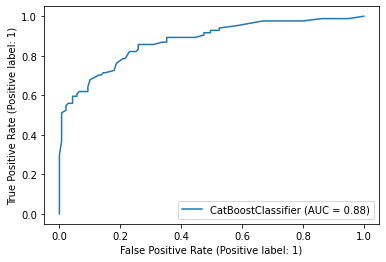

In [163]:
cat_clf = CatBoostClassifier(n_estimators=50, learning_rate=0.1,depth=6)

cat_clf.fit(X_train, y_train)
pred = cat_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))

#AUC 값.

metrics.plot_roc_curve(cat_clf, X_test, y_test) 

plt.show()